In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

In [112]:
df = pd.read_csv('./data/sample_location_data.csv')
column_names = df.columns.tolist()
df = df.reset_index()
df = df.rename(columns=dict(zip(df.columns[65:], ['level_{}'.format(i) for i in range(65, 74)])))
df = df.rename(columns=dict(zip(df.columns[:9], column_names)))
df.head()


,id,device_id,latitude,longitude,ts,payload,message_md5,meta_data,meta_data_json,level_9,...,level_64,level_65,level_66,level_67,level_68,level_69,level_70,level_71,level_72,level_73
0,1320143558,865284042839914,46.469460,-120.396347,2024-01-26 04:27:23,"{\ignition_on_upload_interval\"": 30","\""ignition_off_upload_interval\"": 3600","\""angle_upload_interval\"": 15","\""distance_upload_interval\"": 0","\""over_speed_alarm_setting_network_sig_streng...",...,"\""gps\"": true","\""engine_hours\"": 6520.393611075367","\""idle_time_hours\"": 3439.64111110227","\""engine_state\"": \""on\""","\""idle_state\"": \""off\""","\""status\"": \""moving\""","\""status_start_ts\"": \""2024-01-26 01:51:13\""","\""time_sec_difference\"": 2","\""dot_identifier\"": \""2189018\""}""",NaN
1,1320143551,865284042839914,46.469620,-120.396362,2024-01-26 04:27:21,"{\ignition_on_upload_interval\"": 30","\""ignition_off_upload_interval\"": 3600","\""angle_upload_interval\"": 15","\""distance_upload_interval\"": 0","\""over_speed_alarm_setting_network_sig_streng...",...,"\""gps\"": true","\""engine_hours\"": 6520.393055519811","\""idle_time_hours\"": 3439.64111110227","\""engine_state\"": \""on\""","\""idle_state\"": \""off\""","\""status\"": \""moving\""","\""status_start_ts\"": \""2024-01-26 01:51:13\""","\""time_sec_difference\"": 1","\""dot_identifier\"": \""2189018\""}""",NaN
2,1320143548,865284042839914,46.469681,-120.396393,2024-01-26 04:27:20,"{\ignition_on_upload_interval\"": 30","\""ignition_off_upload_interval\"": 3600","\""angle_upload_interval\"": 15","\""distance_upload_interval\"": 0","\""over_speed_alarm_setting_network_sig_streng...",...,"\""gps\"": true","\""engine_hours\"": 6520.392777742033","\""idle_time_hours\"": 3439.64111110227","\""engine_state\"": \""on\""","\""idle_state\"": \""off\""","\""status\"": \""moving\""","\""status_start_ts\"": \""2024-01-26 01:51:13\""","\""time_sec_difference\"": 1","\""dot_identifier\"": \""2189018\""}""",NaN
3,1320143542,865284042839914,46.469730,-120.396439,2024-01-26 04:27:19,"{\ignition_on_upload_interval\"": 30","\""ignition_off_upload_interval\"": 3600","\""angle_upload_interval\"": 15","\""distance_upload_interval\"": 0","\""over_speed_alarm_setting_network_sig_streng...",...,"\""gps\"": true","\""engine_hours\"": 6520.392499964255","\""idle_time_hours\"": 3439.64111110227","\""engine_state\"": \""on\""","\""idle_state\"": \""off\""","\""status\"": \""moving\""","\""status_start_ts\"": \""2024-01-26 01:51:13\""","\""time_sec_difference\"": 7","\""dot_identifier\"": \""2189018\""}""",NaN
4,1320143415,865284042839914,46.469841,-120.396751,2024-01-26 04:27:12,"{\ignition_on_upload_interval\"": 30","\""ignition_off_upload_interval\"": 3600","\""angle_upload_interval\"": 15","\""distance_upload_interval\"": 0","\""over_speed_alarm_setting_network_sig_streng...",...,"\""gps\"": true","\""engine_hours\"": 6520.390555519811","\""idle_time_hours\"": 3439.64111110227","\""engine_state\"": \""on\""","\""idle_state\"": \""off\""","\""status\"": \""moving\""","\""status_start_ts\"": \""2024-01-26 01:51:13\""","\""time_sec_difference\"": 5","\""dot_identifier\"": \""2189018\""}""",NaN


In [93]:
def strip_text(text):
    text = str(text)
    text = text.split(':')[-1]
    return text

In [113]:
object_columns = df.select_dtypes(include='object').columns
df[object_columns[1:]] = df[object_columns[1:]].applymap(strip_text)

In [114]:
df.head()

,id,device_id,latitude,longitude,ts,payload,message_md5,meta_data,meta_data_json,level_9,...,level_64,level_65,level_66,level_67,level_68,level_69,level_70,level_71,level_72,level_73
0,1320143558,865284042839914,46.469460,-120.396347,2024-01-26 04:27:23,30,3600,15,0,120,...,true,6520.393611075367,3439.64111110227,"\""on\""","\""off\""","\""moving\""","13\""",2,"\""2189018\""}""",NaN
1,1320143551,865284042839914,46.469620,-120.396362,2024-01-26 04:27:21,30,3600,15,0,120,...,true,6520.393055519811,3439.64111110227,"\""on\""","\""off\""","\""moving\""","13\""",1,"\""2189018\""}""",NaN
2,1320143548,865284042839914,46.469681,-120.396393,2024-01-26 04:27:20,30,3600,15,0,120,...,true,6520.392777742033,3439.64111110227,"\""on\""","\""off\""","\""moving\""","13\""",1,"\""2189018\""}""",NaN
3,1320143542,865284042839914,46.469730,-120.396439,2024-01-26 04:27:19,30,3600,15,0,120,...,true,6520.392499964255,3439.64111110227,"\""on\""","\""off\""","\""moving\""","13\""",7,"\""2189018\""}""",NaN
4,1320143415,865284042839914,46.469841,-120.396751,2024-01-26 04:27:12,30,3600,15,0,120,...,true,6520.390555519811,3439.64111110227,"\""on\""","\""off\""","\""moving\""","13\""",5,"\""2189018\""}""",NaN


In [116]:
# df.iloc[:, 9:] = df.iloc[:, 10:].apply(strip_text)
# df.iloc[:, 9:]

In [119]:
# Create a Point object for each row using longitude and latitude columns
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Print the GeoDataFrame
gdf.head()


,id,device_id,latitude,longitude,ts,payload,message_md5,meta_data,meta_data_json,level_9,...,level_65,level_66,level_67,level_68,level_69,level_70,level_71,level_72,level_73,geometry
0,1320143558,865284042839914,46.469460,-120.396347,2024-01-26 04:27:23,30,3600,15,0,120,...,6520.393611075367,3439.64111110227,"\""on\""","\""off\""","\""moving\""","13\""",2,"\""2189018\""}""",NaN,POINT (-120.39635 46.46946)
1,1320143551,865284042839914,46.469620,-120.396362,2024-01-26 04:27:21,30,3600,15,0,120,...,6520.393055519811,3439.64111110227,"\""on\""","\""off\""","\""moving\""","13\""",1,"\""2189018\""}""",NaN,POINT (-120.39636 46.46962)
2,1320143548,865284042839914,46.469681,-120.396393,2024-01-26 04:27:20,30,3600,15,0,120,...,6520.392777742033,3439.64111110227,"\""on\""","\""off\""","\""moving\""","13\""",1,"\""2189018\""}""",NaN,POINT (-120.39639 46.46968)
3,1320143542,865284042839914,46.469730,-120.396439,2024-01-26 04:27:19,30,3600,15,0,120,...,6520.392499964255,3439.64111110227,"\""on\""","\""off\""","\""moving\""","13\""",7,"\""2189018\""}""",NaN,POINT (-120.39644 46.46973)
4,1320143415,865284042839914,46.469841,-120.396751,2024-01-26 04:27:12,30,3600,15,0,120,...,6520.390555519811,3439.64111110227,"\""on\""","\""off\""","\""moving\""","13\""",5,"\""2189018\""}""",NaN,POINT (-120.39675 46.46984)


<Axes: >

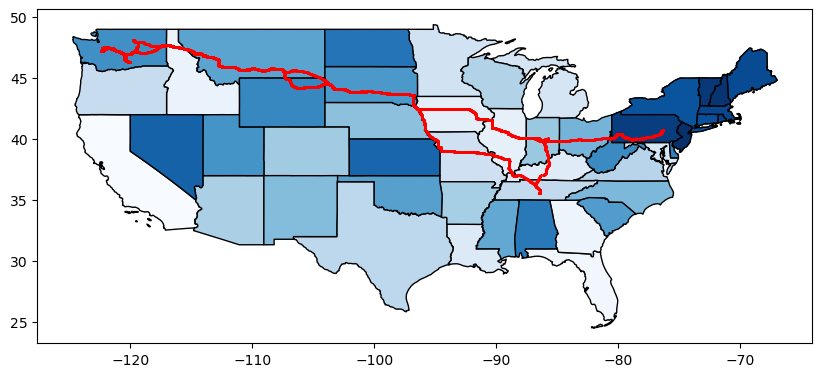

In [169]:
usa = gpd.read_file('./data/usa-states-census-2014.shp')
usa.head()
usa.plot(figsize=(10, 10), cmap='Blues', edgecolor='black')
gdf.plot(ax=plt.gca(), color='red', markersize=0.3)
# gdf[4000:10000].plot( color = 'green', ax=plt.gca(), markersize=0.3)